# 2024亚太杯C题第四问

## 一、数据导入和平稳性检验

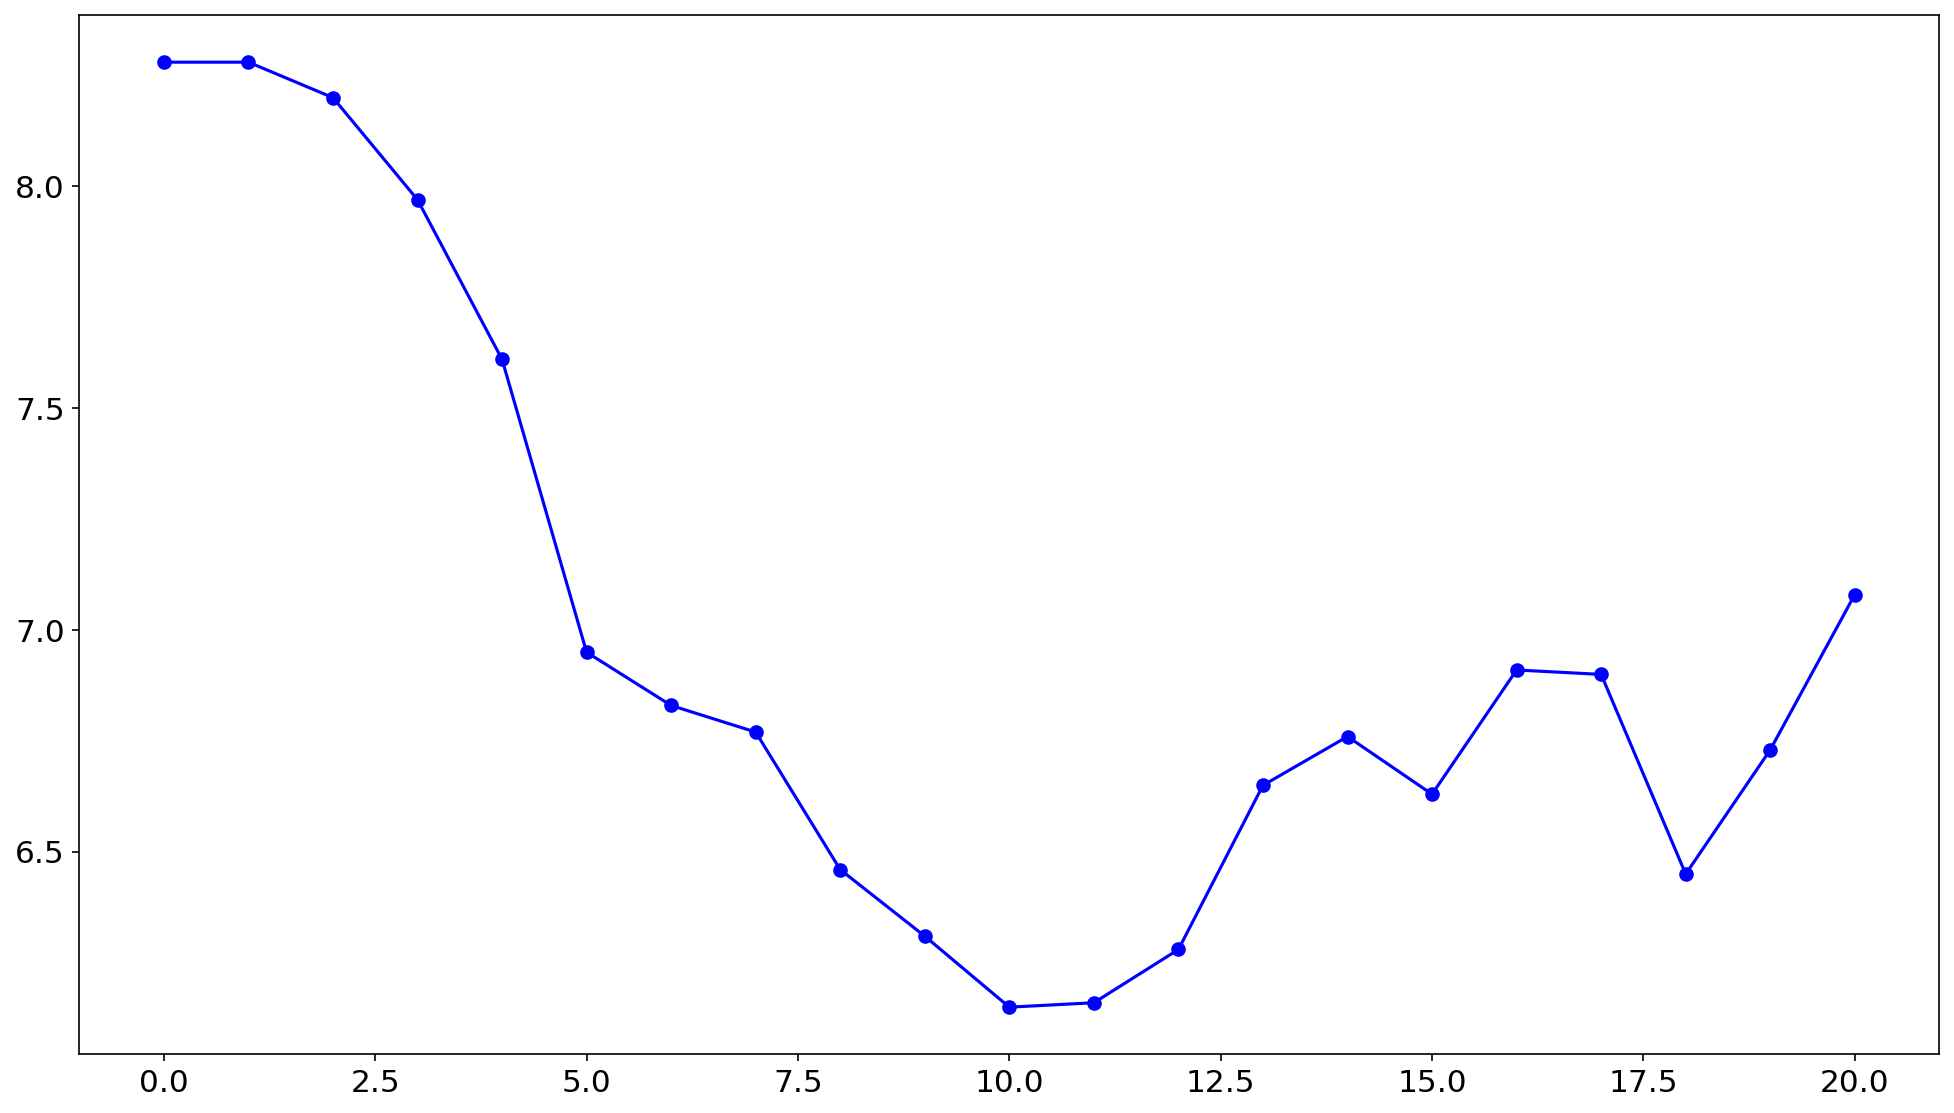

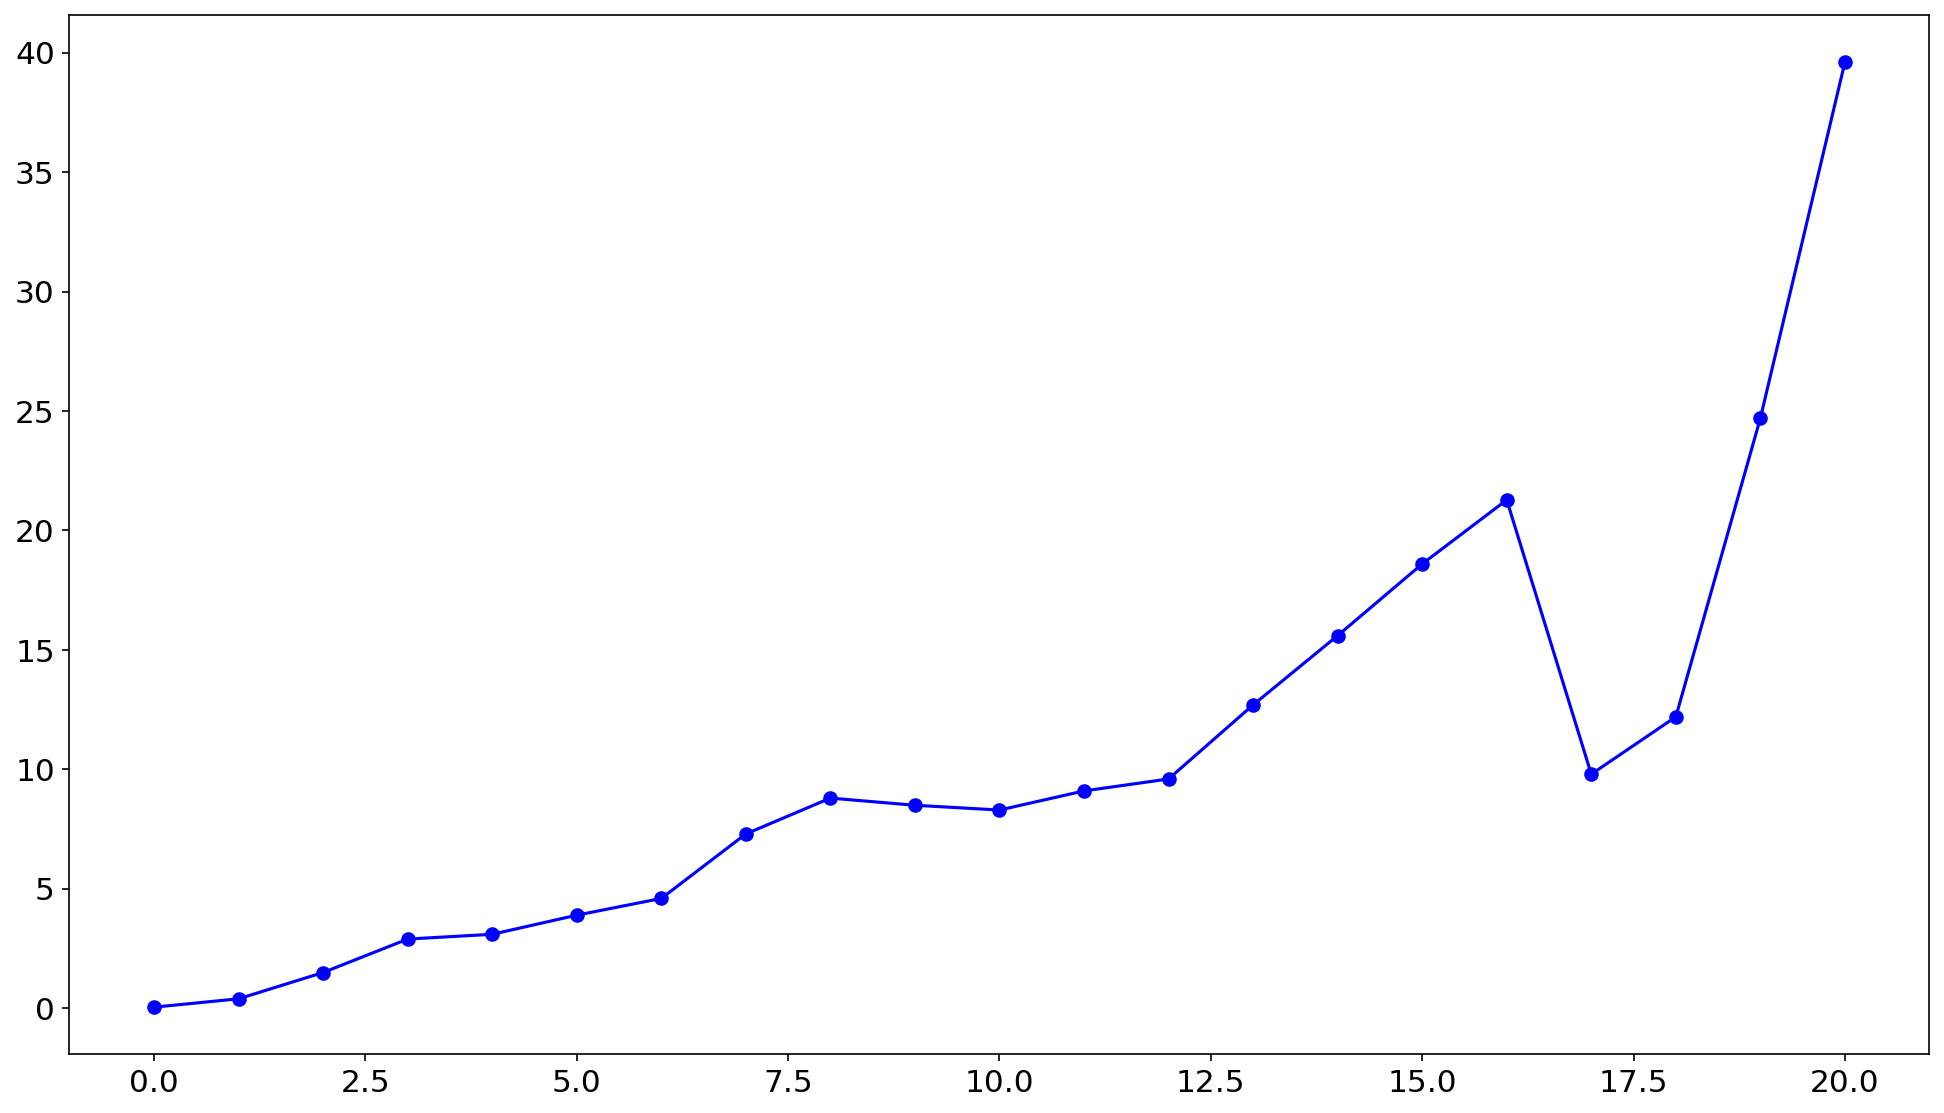

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch.unitroot import PhillipsPerron
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
from statsmodels.tsa.vector_ar.var_model import VAR

# 汇率数据
exchange_rate = np.array([8.28, 8.28, 8.2, 7.97, 7.61, 6.95, 6.83, 6.77, 6.46, 6.31, 6.15, 6.16, 6.28, 6.65, 6.76, 6.63, 6.91,
                          6.9, 6.45, 6.73, 7.08])
# 宠物食品出口总额数据
export_amount = np.array([0.05, 0.4, 1.5, 2.9, 3.1, 3.9, 4.6, 7.3, 8.8, 8.5, 8.3, 9.1, 9.6, 12.7, 15.6, 18.6, 21.28,
                          9.8, 12.2, 24.7, 39.6])

# 将数据转换为DataFrame，设置日期索引（这里简单使用整数作为索引，实际应用中应使用真实日期）
df = pd.DataFrame({'exchange_rate': exchange_rate, 'export_amount': export_amount})
df.index = pd.date_range(start='2003', periods=len(df), freq='Y')

## 原始序列平稳性检验
plt.figure(figsize=(16, 9), dpi=150)
plt.plot(exchange_rate, linestyle='-', color='b', marker='o', markerfacecolor='b')
plt.xlabel('', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig(fname='汇率原始数据.png')

plt.figure(figsize=(16, 9), dpi=150)
plt.plot(export_amount, linestyle='-', color='b', marker='o', markerfacecolor='b')
plt.xlabel('', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig(fname='宠物食品出口总额原始数据.png')

## 二、数据变换
### 2.1 汇率数据

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.829
P-value                         0.054
Lags                                9
-------------------------------------

Trend: Constant
Critical Values: -3.83 (1%), -3.03 (5%), -2.66 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
不拒绝原假设，PP检验下对数变换的汇率数据是非平稳数据。
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -7.655
P-value                         0.000
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: -3.86 (1%), -3.04 (5%), -2.66 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
拒绝原假设，PP检验下二阶差分后的数据是平稳数据。


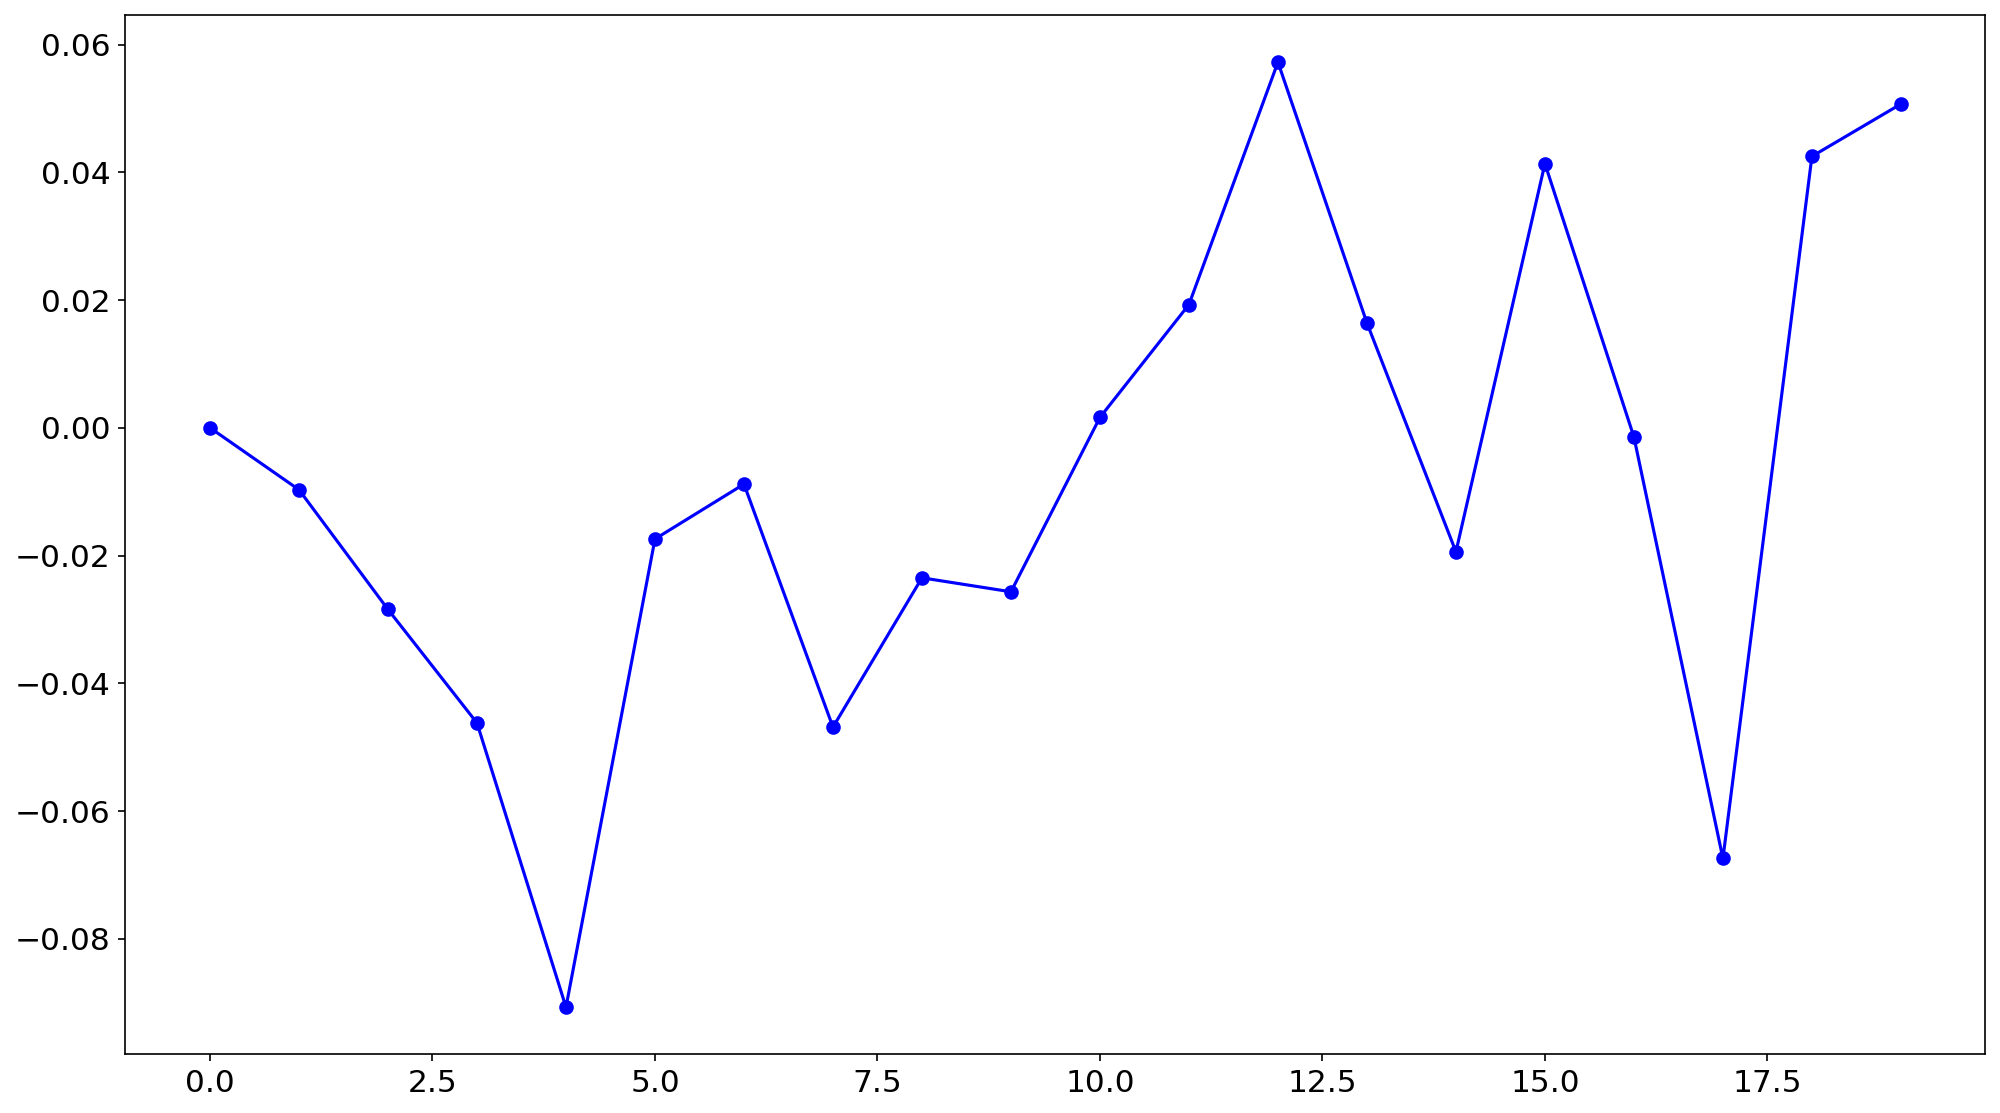

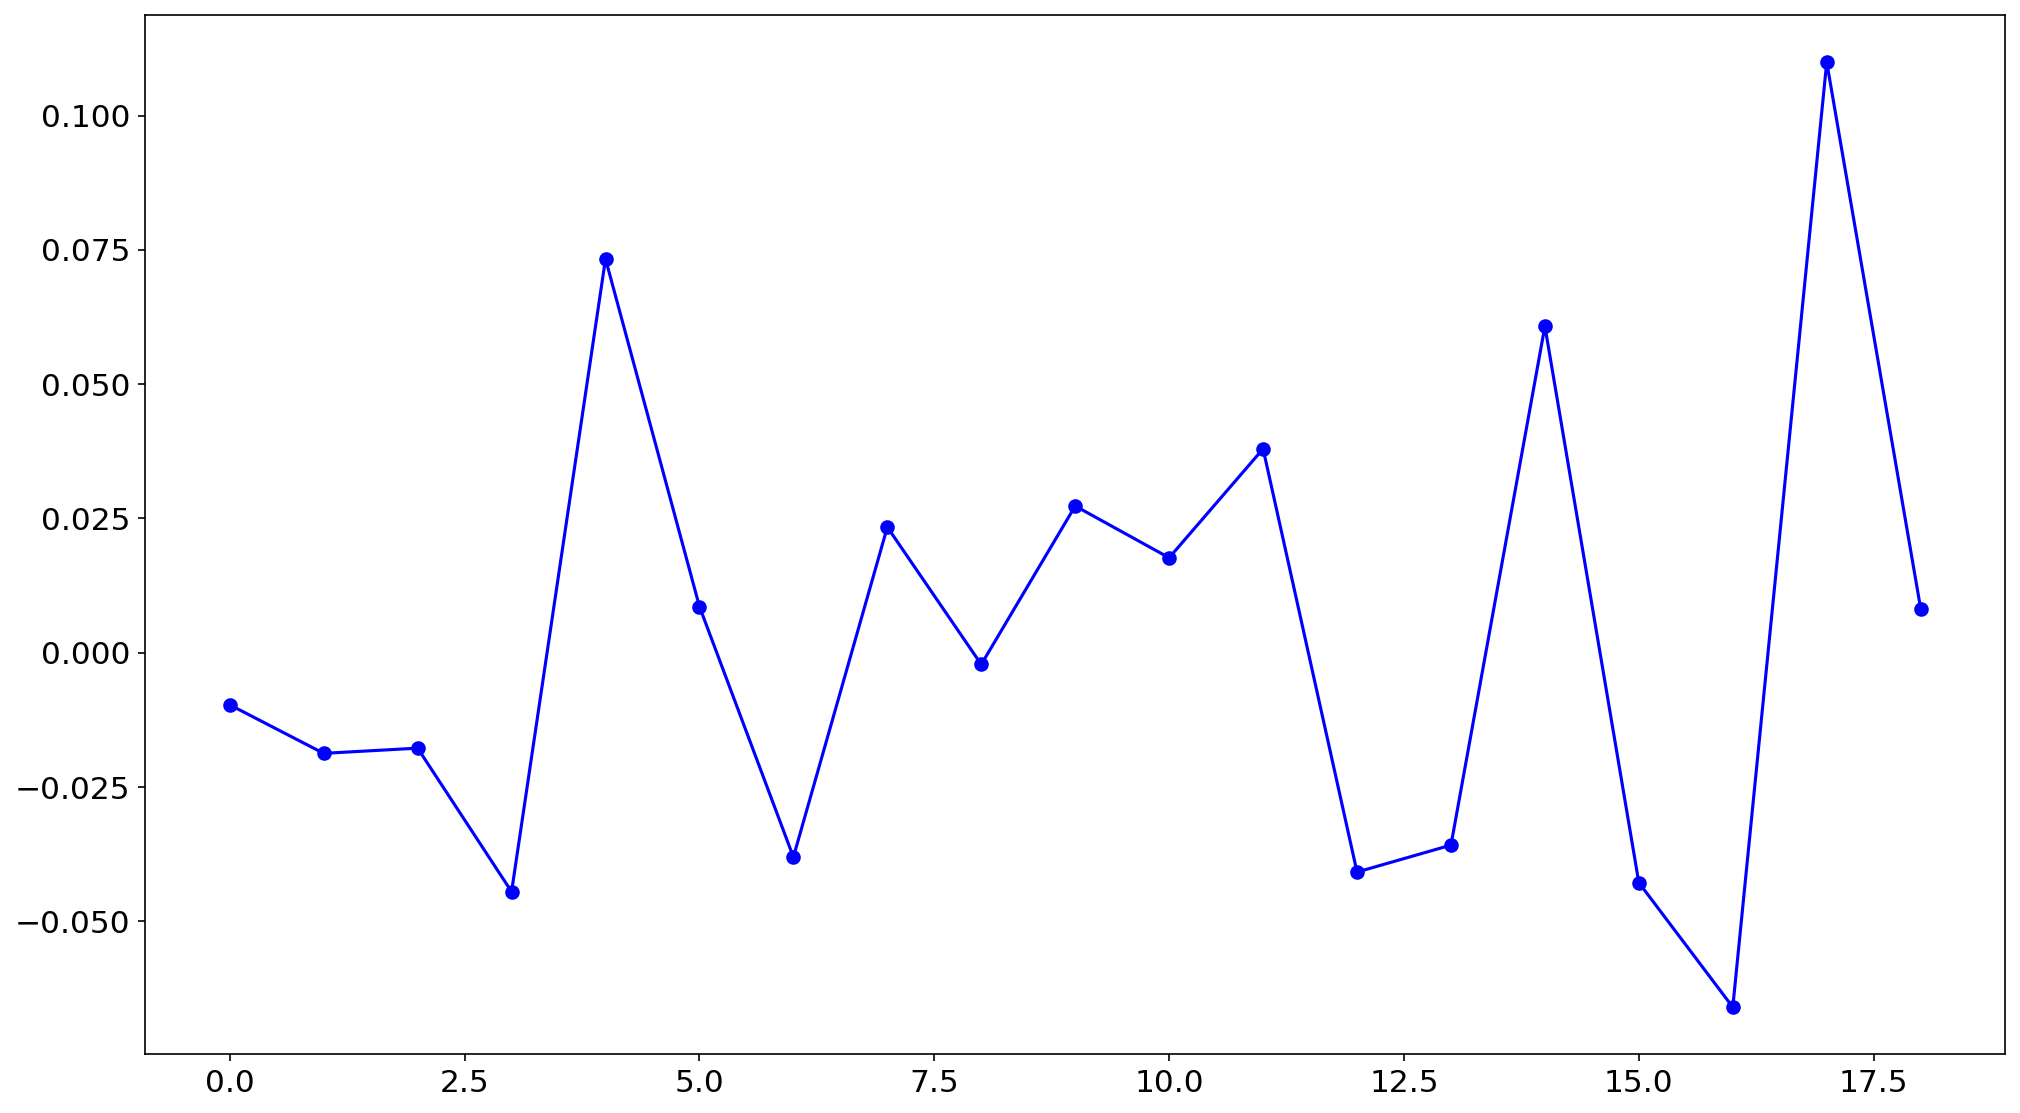

In [3]:
## 数据变换、差分与平稳性检验
data1 = np.log(df['exchange_rate'])
data2 = np.log(df['export_amount'])

# 一阶差分
first_order_diff1 = np.diff(data1)
first_order_diff2 = np.diff(data2)

# 绘制序列图做平稳性检验
plt.figure(figsize=(16, 9), dpi=150)
plt.plot(first_order_diff1, linestyle='-', color='b', marker='o', markerfacecolor='b')
plt.xlabel('', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig(fname='一阶差分的汇率数据.png')

# 对变换的汇率数据做 PP 检验
pp = PhillipsPerron(first_order_diff1)
print(pp.summary().as_text())

p_value = pp.pvalue

if p_value < 0.05:
    print("拒绝原假设，PP检验下对数变换的汇率数据是平稳数据。")
else:
    print("不拒绝原假设，PP检验下对数变换的汇率数据是非平稳数据。")

# 二阶差分
second_order_diff1 = np.diff(first_order_diff1)

# 绘制二阶差分后的序列图
plt.figure(figsize=(16, 9), dpi=150)
plt.plot(second_order_diff1, linestyle='-', color='b', marker='o', markerfacecolor='b')
plt.xlabel('', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig(fname='二阶差分的汇率数据.png')

# 对二阶差分后的数据做 PP 检验
pp = PhillipsPerron(second_order_diff1)
print(pp.summary().as_text())

p_value = pp.pvalue

if p_value < 0.05:
    print("拒绝原假设，PP检验下二阶差分后的数据是平稳数据。")
else:
    print("不拒绝原假设，PP检验下二阶差分后的数据是非平稳数据。")

### 2.2 出口数据

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -6.678
P-value                         0.000
Lags                                9
-------------------------------------

Trend: Constant
Critical Values: -3.83 (1%), -3.03 (5%), -2.66 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
拒绝原假设，PP检验下对数变换的宠物食品出口总额是平稳数据。


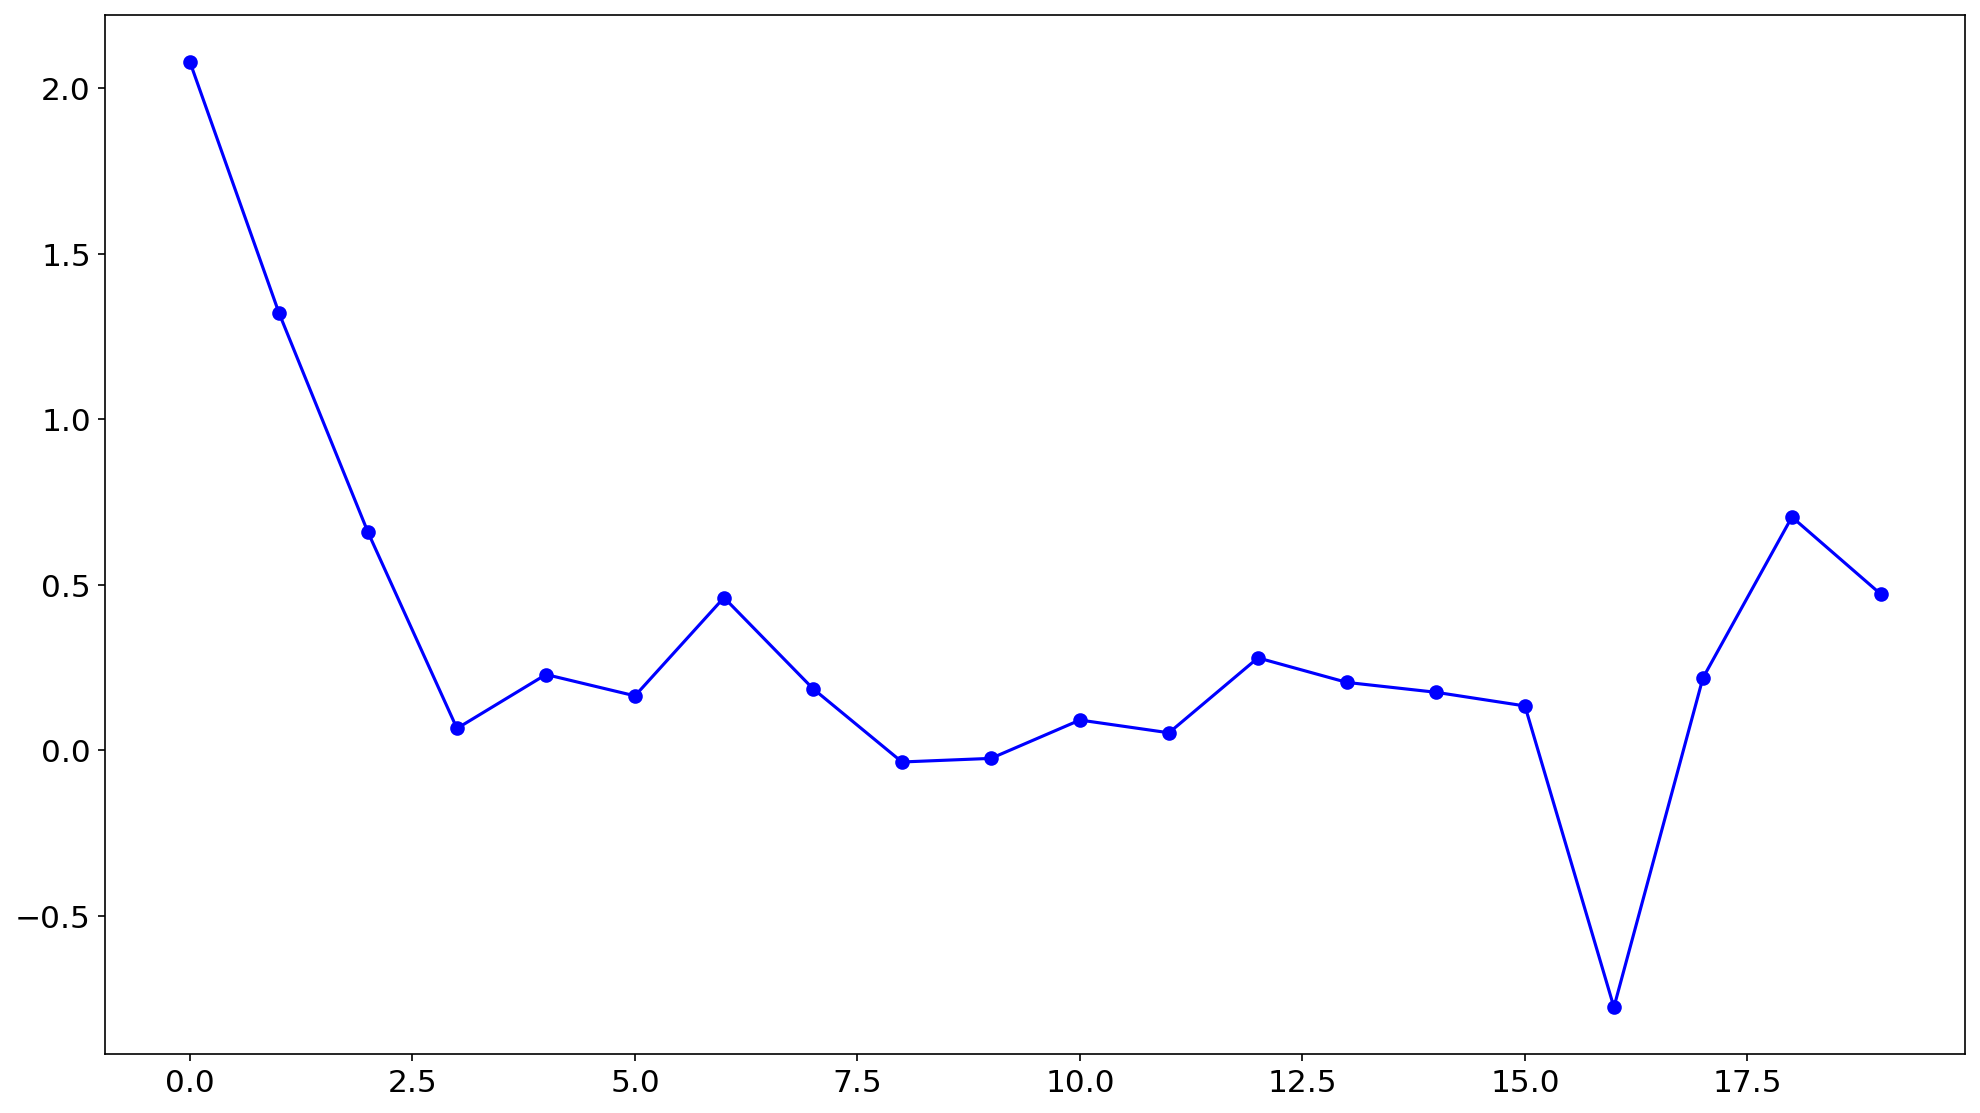

In [4]:

# 绘制序列图做平稳性检验
plt.figure(figsize=(16, 9), dpi=150)
plt.plot(first_order_diff2, linestyle='-', color='b', marker='o', markerfacecolor='b')
plt.xlabel('', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig(fname='一阶差分的宠物食品出口总额.png')

# 对变换的宠物食品出口总额做 PP 检验
pp = PhillipsPerron(first_order_diff2)
print(pp.summary().as_text())

p_value = pp.pvalue

if p_value < 0.05:
    print("拒绝原假设，PP检验下对数变换的宠物食品出口总额是平稳数据。")
else:
    print("不拒绝原假设，PP检验下对数变换的宠物食品出口总额是非平稳数据。")

## 三、协整检验（EG两步法）
### 3.1 OLS回归

In [5]:
## 协整检验（EG两步法）
# 处理长度差异
first_order_diff2 = first_order_diff2[1:]
df_coint = pd.DataFrame({'second_order_diff_exchange_rate': second_order_diff1, 'first_order_diff_export_amount': first_order_diff2})

# OLS回归
y = df_coint['first_order_diff_export_amount']
X = sm.add_constant(df_coint['second_order_diff_exchange_rate'])
model = sm.OLS(y, X)
results = model.fit()

print("回归系数：", results.params)

回归系数： const                              0.237081
second_order_diff_exchange_rate    1.786670
dtype: float64


$$
y = 0.237081 + 1.786670x + \epsilon_t
$$
其中，$y$是变换后的出口数据，$x$是变换后的汇率数据

### 3.2 Engle - Granger协整检验

In [6]:
# Engle - Granger协整检验
coint_result = coint(df_coint['second_order_diff_exchange_rate'], df_coint['first_order_diff_export_amount'])
print("Engle - Granger协整检验的t统计量:", coint_result[0])
print("p - 值:", coint_result[1])
if coint_result[1] < 0.05:
    print("拒绝原假设，序列之间存在协整关系。")
else:
    print("不拒绝原假设，序列之间不存在协整关系。")

Engle - Granger协整检验的t统计量: -5.186958936726272
p - 值: 7.353377159641887e-05
拒绝原假设，序列之间存在协整关系。


## 四、建立VAR模型并做因果检验

In [7]:
## 建立VAR模型
# 将数据准备为适合VAR模型的格式
data_for_var = pd.concat([pd.Series(second_order_diff1), pd.Series(first_order_diff2)], axis=1)
data_for_var.columns = ['exchange_rate_diff', 'export_amount_diff']

# 确定VAR模型的滞后阶数
lag_order = 2

# 建立VAR模型
var_model = VAR(data_for_var)
results_var = var_model.fit(lag_order)

# 输出VAR模型的结果摘要
print(results_var.summary())

## 因果关系检验（格兰杰因果检验）
# 检验汇率差分是否是出口总额差分的格兰杰原因
granger_causality_exchange_to_export = results_var.test_causality('exchange_rate_diff', 'export_amount_diff')
print("汇率差分是否是出口总额差分的格兰杰原因：")
print(granger_causality_exchange_to_export.summary())

# 检验出口总额差分是否是汇率差分的格兰杰原因
granger_causality_export_to_exchange = results_var.test_causality('export_amount_diff', 'exchange_rate_diff')
print("出口总额差分是否是汇率差分的格兰杰原因：")
print(granger_causality_export_to_exchange.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 24, Nov, 2024
Time:                     12:30:15
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -8.29451
Nobs:                     17.0000    HQIC:                  -8.73591
Log likelihood:           36.4255    FPE:                0.000158647
AIC:                     -8.78463    Det(Omega_mle):     9.47291e-05
--------------------------------------------------------------------
Results for equation exchange_rate_diff
                           coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------
const                         0.008267         0.009003            0.918           0.358
L1.exchange_rate_diff        -0.515090         0.175475           -2.935           0.003
L1.export_amoun

## 五、说明
### 5.1 协整
通过 Engle - Granger 协整检验，得到 t 统计量为 - 5.186958936726272，p - 值为 7.353377159641887e - 05，由于 p - 值小于 0.05，拒绝原假设，说明汇率和出口量之间存在协整关系。协整关系意味着虽然两个变量本身可能是非平稳的，但它们之间存在一种长期稳定的均衡关系。
### 5.2 VAR
在VAR模型中  
对于变换后的汇率方程$y_{1t}$:
$$
y_{1t} = 0.008267  -0.515090y_{1,t-1} + 0.050848y_{2,t-1} -0.576241y_{1,t-2} -0.063141y_{2,t-2} + \epsilon_{1t}
$$
对于变换后的出口总额方程$y_{2t}$:
$$
y_{2t} = 0.169004  -1.336147y_{1,t-1} + 0.264191y_{2,t-1} -0.052018y_{1,t-2} -0.272930y_{2,t-2} + \epsilon_{2t}
$$
对于汇率方程：变换后的汇率数据自身滞后一期的系数为 - 0.515090，滞后二期的系数为 - 0.576241，表明：汇率差分的过去值对当前汇率差分有反向的影响；变换后的出口总额的滞后 1 期系数为 0.050848，滞后 2 期系数为 - 0.063141，说明出口总额差分的过去值对汇率差分有一定的影响，但方向在不同滞后期有所不同  
对于出口方程：汇率差分的滞后 1 期系数为 - 1.336147，滞后 2 期系数为 - 0.052018，这意味着汇率差分的过去值对出口总额差分有负向的影响（虽然滞后 2 期的影响相对较小）；
出口总额差分自身滞后 1 期系数为 0.264191，滞后 2 期系数为 - 0.272930，表明出口总额差分的过去值对自身也有影响，且方向在不同滞后期不同。
### 5.3 格兰杰因果检验
从格兰杰因果检验来看，汇率差分是出口总额差分的格兰杰原因（在 5% 显著性水平下拒绝原假设，p - 值为 0.012），这意味着汇率差分的过去值对于预测出口总额差分是有帮助的。  
而出口总额差分不是汇率差分的格兰杰原因（在 5% 显著性水平下不拒绝原假设，p - 值为 0.753），说明出口总额差分的过去值对于预测汇率差分没有显著的帮助。